In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from constants import *

In [4]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,2.023706,1.00
1,084_2_C_day2,0.213441,1.00
2,043_5_S_day5,0.029891,0.88
3,093_1_C_day2,0.447800,1.00
4,078_1_C_day4,0.161652,0.61
...,...,...,...
6397,128_2_S_day1,0.472012,0.79
6398,182_2_S_day1,0.688526,0.03
6399,048_2_C_day2,0.507519,0.12
6400,131_3_C_day1,0.213723,0.63


In [5]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df = pd.merge(pareto_front_df, scaling_df)
pareto_front_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,2.023706,1.00,1.072667,0.83
1,084_2_C_day2,0.213441,1.00,1.036260,0.95
2,043_5_S_day5,0.029891,0.88,1.004686,0.88
3,093_1_C_day2,0.447800,1.00,1.057325,0.70
4,078_1_C_day4,0.161652,0.61,1.024057,0.61
...,...,...,...,...,...
6397,128_2_S_day1,0.472012,0.79,1.044927,0.78
6398,182_2_S_day1,0.688526,0.03,1.109366,0.45
6399,048_2_C_day2,0.507519,0.12,1.068087,0.19
6400,131_3_C_day1,0.213723,0.63,1.021045,0.65


In [54]:
dist_column = 'pareto front scaling distance'
loc_column = 'pareto front scaling location'

In [7]:
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [8]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,Salt,None
1,PimpiBig4,031_3_S_day5,5,278,31,3,Salt,None
2,PimpiBig4,055_2_S_day5,5,151,55,2,Salt,None
3,PimpiBig4,098_1_S_day5,5,14,98,1,Salt,None
4,PimpiBig4,101_1_S_day5,5,106,101,1,Salt,None
...,...,...,...,...,...,...,...,...
8410,PimpiBig6,053_1_C_day5,5,226,53,1,Control,None
8411,PimpiBig6,045_2_C_day5,5,227,45,2,Control,None
8412,PimpiBig6,045_3_S_day5,5,228,45,3,Salt,None
8413,PimpiBig6,053_2_S_day5,5,229,53,2,Salt,None


In [9]:
metadata_df = metadata_df[metadata_df['hormone'] != 'None']
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
1382,PimpiIAA1,248_1_S_iaa_day9,9,1,248,1,Salt,iaa
1383,PimpiIAA1,248_2_S_iaa_day9,9,2,248,2,Salt,iaa
1384,PimpiIAA1,248_3_S_iaa_day9,9,3,248,3,Salt,iaa
1385,PimpiIAA1,248_4_S_iaa_day9,9,4,248,4,Salt,iaa
1386,PimpiIAA1,248_5_S_iaa_day9,9,5,248,5,Salt,iaa
...,...,...,...,...,...,...,...,...
4195,PimpiIAA1,1511_2_C_noiaa_day5,5,148,1511,2,Control,noiaa
4196,PimpiIAA1,1511_3_C_noiaa_day5,5,149,1511,3,Control,noiaa
4197,PimpiIAA1,1511_4_C_noiaa_day5,5,150,1511,4,Control,noiaa
4198,PimpiIAA1,1511_5_C_noiaa_day5,5,151,1511,5,Control,noiaa


In [26]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone
0,248_9_S_noiaa_day9,1.934651,0.93,1.089103,0.72,PimpiIAA1,9,46,248,9,Salt,noiaa
1,248_5_S_iaa_day9,11.208500,1.00,1.252299,0.36,PimpiIAA1,9,5,248,5,Salt,iaa
2,1511_4_S_iaa_day9,5.853187,0.88,1.085219,0.48,PimpiIAA1,9,122,1511,4,Salt,iaa
3,058_9_C_noiaa_day9,4.601898,0.89,1.086100,0.59,PimpiIAA1,9,116,58,9,Control,noiaa
4,1511_6_C_iaa_day5,0.364193,1.00,1.183724,1.00,PimpiIAA1,5,134,1511,6,Control,iaa
...,...,...,...,...,...,...,...,...,...,...,...,...
126,1511_6_C_iaa_day9,12.061797,1.00,1.193200,0.40,PimpiIAA1,9,134,1511,6,Control,iaa
127,248_5_S_noiaa_day9,3.031600,0.66,1.100918,0.46,PimpiIAA1,9,42,248,5,Salt,noiaa
128,1511_3_C_noiaa_day9,3.433474,0.37,1.080855,0.37,PimpiIAA1,9,149,1511,3,Control,noiaa
129,248_7_C_iaa_day9,6.049202,1.00,1.174815,0.66,PimpiIAA1,9,17,248,7,Control,iaa


<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling location'>

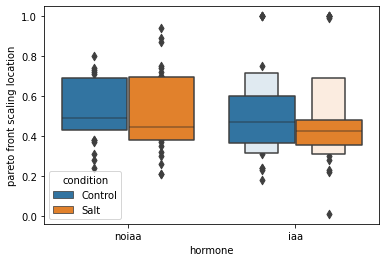

In [58]:
sns.boxenplot(x='hormone', y=loc_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling distance'>

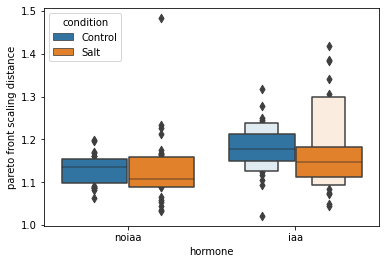

In [59]:
sns.boxenplot(x='hormone', y=dist_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

In [32]:
from scipy.stats import mannwhitneyu

In [38]:
noiaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [39]:
noiaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [44]:
iaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [45]:
iaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [46]:
mannwhitneyu(noiaa_control, noiaa_salt)

MannwhitneyuResult(statistic=316.0, pvalue=0.16137304485851356)

In [47]:
mannwhitneyu(iaa_control, iaa_salt)

MannwhitneyuResult(statistic=547.0, pvalue=0.036362541741252634)